# Data Scientist Challenge - LATAM Airlines
## Jesús Berríos
## Globant Data Scientist
---

Problema:

El problema consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de
Chile (SCL).

* **Fecha-I** : Fecha y hora programada del vuelo.
* **Vlo-I** : Número de vuelo programado.
* **Ori-I** : Código de ciudad de origen programado.
* **Des-I** : Código de ciudad de destino programado.
* **Emp-I** : Código aerolínea de vuelo programado.
* **Fecha-O** : Fecha y hora de operación del vuelo.
* **Vlo-O** : Número de vuelo de operación del vuelo.
* **Ori-O** : Código de ciudad de origen de operación
* **Des-O** : Código de ciudad de destino de operación.
* **Emp-O** : Código aerolínea de vuelo operado.
* **DIA** : Día del mes de operación del vuelo.
* **MES** : Número de mes de operación del vuelo.
* **AÑO** : Año de operación del vuelo.
* **DIANOM** : Día de la semana de operación del vuelo.
* **TIPOVUELO** : Tipo de vuelo, I =Internacional, N =Nacional.
* **OPERA** : Nombre de aerolínea que opera.
* **SIGLAORI** : Nombre ciudad origen.
* **SIGLADES** : Nombre ciudad destino
---
Se importan las librerías a utilizar

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.graph_objs as go
from datetime import datetime
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

Leer dataset

In [2]:
df = pd.read_csv('./input/dataset_SCL.csv')
df

/Users/jesus.berrios/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


## 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?
Se procede a explorar los datos.

#### Se exploran dtypes y existencias de datos nulos:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


##### Comentarios
* No hay existencia de datos nulos
* Algunos columnas presentan DType object, por lo que podrían contener strings

#### Cantidad de datos por Aerolínea y tipo de vuelo

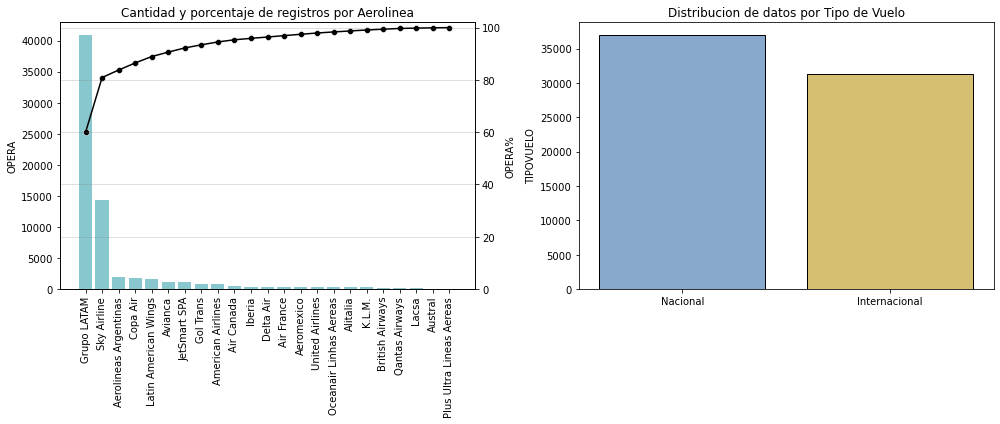

In [4]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(14,6))
axes = axes.flatten()

ax = axes[0]
ax.set_title('Cantidad y porcentaje de registros por Aerolinea')
sns.barplot(x=df.OPERA.value_counts().index,y=df.OPERA.value_counts(),ax=ax,color='#7DD1D8')
ax.tick_params(axis='x', labelrotation = 90)
ax2 = ax.twinx()
ax2.set_ylabel('OPERA%')
ax2.grid(color='grey',linestyle='-',alpha=0.3)
sns.lineplot(x=df.OPERA.value_counts().index,y=df.OPERA.value_counts().cumsum()/df.OPERA.value_counts().sum()*100,ax=ax2,color='k')
sns.scatterplot(x=df.OPERA.value_counts().index,y=df.OPERA.value_counts().cumsum()/df.OPERA.value_counts().sum()*100,ax=ax2,color='k')
ax2.set_ylim([0,102])


ax = axes[1]
ax.set_title('Distribucion de datos por Tipo de Vuelo')
sns.barplot(x=df.TIPOVUELO.value_counts().index.map({'I':'Internacional','N':'Nacional'}),y=df.TIPOVUELO.value_counts(),ax=ax,palette=['#7DA8D8','#E7C862'],edgecolor='k')
#ax.tick_params(axis='x', labelrotation = 90)

fig.tight_layout()

##### Comentarios
* La aerolínea de operación que presenta mayor cantidad de registros es LATAM, con alrededor de 40000 filas. Esta categoría compone alrededor el 60% del dataset.
* La aerolínea Sky, con casi 15000 registros concentra alrededor del 20% de los datos.
* La cantidad de datos por aerolínea restante compone el 20% del total, en el que ninguna representa más del 10% de la muestra.
* La distribución de datos por tipo de vuelo está relativamente balanceada, siendo la muestra de datos de vuelos nacionales ligeramente mayor con respecto a la cantidad de vuelos internacionales.

#### Cantidad de Vuelos Origen-Destino para Rutas Nacionales e Internacionales

In [7]:
dfsn = df[['SIGLAORI','SIGLADES','Fecha-I']][df.TIPOVUELO=='N'].groupby(['SIGLAORI','SIGLADES'])[['Fecha-I']].count().reset_index().rename(columns={'Fecha-I':'vuelos_qty'}).sort_values('vuelos_qty',ascending=False)
dfsn['vuel_p'] = dfsn.vuelos_qty/dfsn.vuelos_qty.sum()*100

# Generate data 
lab=dfsn.SIGLAORI.unique().tolist()+dfsn.SIGLADES.unique().tolist()
position_list = [*range(0,len(dfsn.SIGLAORI.unique().tolist()+dfsn.SIGLADES.unique().tolist()))]
sou = [lab.index(x) for x in dfsn.SIGLAORI]
dest = [lab.index(x) for x in dfsn.SIGLADES]
color_n = [str(sns.color_palette('tab20').as_hex()[x]) for x in range(0,len(lab))]

#Plot Sankey for National
fig = go.Figure(data=[go.Sankey(
  valueformat = ".0f",
  valuesuffix = " vuelos",
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = lab,
      color = color_n
    ),
    link = dict(
      source = sou, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = dest,
      value = dfsn.vuelos_qty.values.tolist(),
      customdata = dfsn.vuel_p.values.tolist(),
      hovertemplate="%{customdata:.2f} %"
  ))])

fig.update_layout(title_text="Cantidad de Vuelos Origen-Destino (Rutas Nacionales)", font_size=10,width=500, height=700)
fig.show()

##### Comentarios:
* Todos los vuelos nacionales tienen como Origen la Ciudad de Santiago
* Las ciudades con mayor cantidad de vuelos son Antofagasta, con 5786 vuelos (15.65% de los vuelos nacionales); y Calama con 5146 vuelos (13.92% de los vuelos nacionales)

In [8]:
dfsi = df[['SIGLAORI','SIGLADES','Fecha-I']][df.TIPOVUELO=='I'].groupby(['SIGLAORI','SIGLADES'])[['Fecha-I']].count().reset_index().rename(columns={'Fecha-I':'vuelos_qty'}).sort_values('vuelos_qty',ascending=False).reset_index(drop=True)
dfsi['vuel_p'] = dfsi.vuelos_qty/dfsi.vuelos_qty.sum()*100

lab_i=dfsi.SIGLAORI.unique().tolist()+dfsi.SIGLADES.unique().tolist()
position_list_i = [*range(0,len(dfsi.SIGLAORI.unique().tolist()+dfsi.SIGLADES.unique().tolist()))]
sou_i = [lab_i.index(x) for x in dfsi.SIGLAORI]
dest_i = [lab_i.index(x) for x in dfsi.SIGLADES]
pal_i = sns.color_palette('tab20').as_hex()*4
color_i = [str(pal_i[x]) for x in range(0,len(lab_i))]

fig = go.Figure(data=[go.Sankey(
  valueformat = ".0f",
  valuesuffix = " vuelos",
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = lab_i,
      color = color_i
    ),
    link = dict(
      source = sou_i, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = dest_i,
      value = dfsi.vuelos_qty.values.tolist(),
      customdata = dfsi.vuel_p.values.tolist(),
      hovertemplate="%{customdata:.2f} %"
  ))])

fig.update_layout(title_text="Cantidad de Vuelos Origen-Destino (Rutas Internacionales)", font_size=10,width=500, height=900)
fig.show()

##### Comentarios
* Todos los vuelos internacionales tienen como Origen la Ciudad de Santiago
* Los 10 principales destinos internacionales se encuentran en el continente Americano. El destino intercontinental con más vuelos es Madrid, con 894 vuelos (2.86% de la muestra).
* Las tres principales rutas internacionales son Santiago-Buenos Aires (6335 vuelos, 20.28%), Santiago-Lima (5270 vuelos, 16.87%) y Santiago-Sao Paulo (3569 vuelos, 11.42%).

#### Cantidad de vuelos de acuerdo a temporalidad de operación de vuelo

In [9]:
df['hora_o'] = df['Fecha-O'].apply(lambda x: int(datetime.strptime(x,'%Y-%m-%d %H:%M:%S').strftime('%H')))

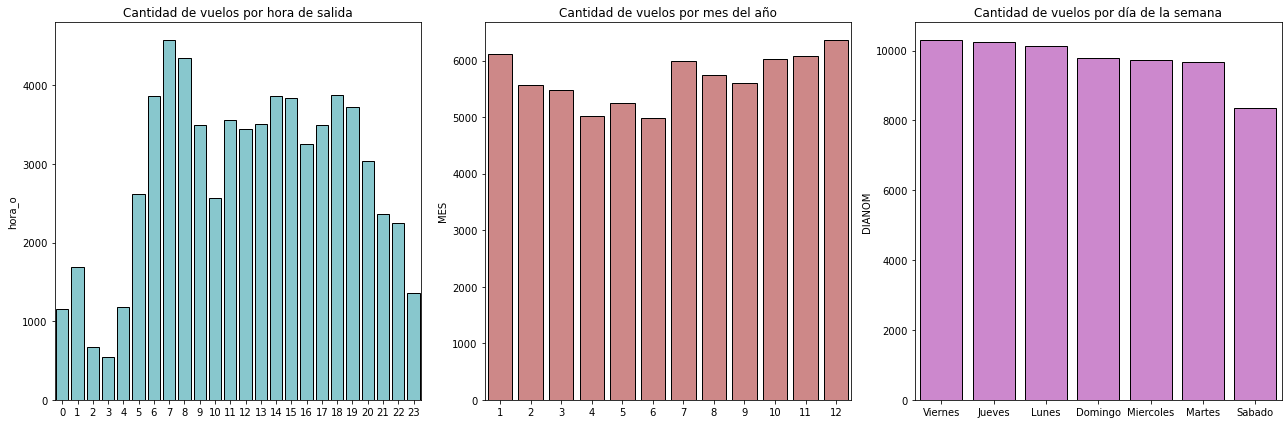

In [10]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(18,6))
axes = axes.flatten()

ax = axes[0]
ax.set_title('Cantidad de vuelos por hora de salida')
sns.barplot(x=df.hora_o.value_counts().sort_index().index,y=df.hora_o.value_counts().sort_index(),ax=ax,color='#7DD1D8',edgecolor='k')
#sns.distplot(df.hora_o,bins=24,hist_kws=dict(edgecolor="black"),ax=ax)

ax = axes[1]
ax.set_title('Cantidad de vuelos por mes del año')
sns.barplot(x=df.MES.value_counts().index,y=df.MES.value_counts(),ax=ax,color='#D87D7D',edgecolor='k')
#ax.tick_params(axis='x', labelrotation = 90)

ax = axes[2]
ax.set_title('Cantidad de vuelos por día de la semana')
sns.barplot(x=df.DIANOM.value_counts().index,y=df.DIANOM.value_counts(),ax=ax,color='#D77DD8',edgecolor='k')

fig.tight_layout()

##### Comentarios
* Se observa gran concentración de vuelos entre las 6-9am, 2-4pm y 6-8pm; mientras que el horario con menos vuelos es 2-4am.
* Los meses con mayor cantidad de vuelos son Diciembre y Enero, y se puede decir que la temporada más baja está desde Abril hasta inicios de Julio.
* El día más concurrido es el Viernes, mientras que el Sábado es el que posee menor cantidad de vuelos.

#### Existen varias columnas que muestran datos programados y pueden compararse con los datos de operación

In [11]:
print('Comparaciones Datos de Vuelos Programados vs. Operación')

for i,j in zip(['Vlo','Ori','Des','Emp'],['Número de Vuelo','Código Ciudad Origen','Código Ciudad Destino','Código Aerolínea']):
    print(j)
    comparison_io = df[i+'-I']==df[i+'-O']
    print(comparison_io.value_counts(normalize=True)*100)
    print('')

Comparaciones Datos de Vuelos Programados vs. Operación
Número de Vuelo
True     97.287629
False     2.712371
dtype: float64

Código Ciudad Origen
True    100.0
dtype: float64

Código Ciudad Destino
True     99.958948
False     0.041052
dtype: float64

Código Aerolínea
True     72.628508
False    27.371492
dtype: float64



In [12]:
df[df['Emp-I']!=df['Emp-O']][['Emp-I','Emp-O','OPERA','SIGLAORI']]\
    .groupby(['Emp-I','Emp-O','OPERA'])[['SIGLAORI']].count().reset_index().rename(columns={'SIGLAORI':'cnt'})\
        .sort_values('cnt',ascending=False).reset_index(drop=True)

,Emp-I,Emp-O,OPERA,cnt
0,LAN,LXP,Grupo LATAM,14549
1,LAW,JMR,Latin American Wings,1547
2,LAN,LPE,Grupo LATAM,1210
3,LAN,DSM,Grupo LATAM,491
4,LAN,LNE,Grupo LATAM,373
5,AVA,LRC,Avianca,265
6,QFU,QFA,Qantas Airways,195
7,LAW,56R,Latin American Wings,17
8,LAW,48O,Latin American Wings,10
9,ARG,AUT,Aerolineas Argentinas,5


##### Comentarios
* En los datos programados vs. operación se pueden observar pequeñas inconsistencias de datos para el número de vuelo y el código de ciudad destino. De esto se puede asumir que por alguna circunstancia el número de vuelo puede variar, o que pueden existir escenarios que puedan cambiar el destino del vuelo de acuerdo al planeado (por ejemplo, condiciones climatológicas).
* Los datos de código ciudad origen programado vs. operación son 100% consistentes.
* Con respecto a los datos del código de aerolínea programado respecto al de operación se tiene una inconsistencia para el 27.37% de los registros. Se puede observar que la mayoría de estos registros se presentan para Grupo Latam, cuya operación es reemplazada por LXP (Latam Express). Aun así, hay gran cantidad de registros (miles), que sustituyen a la operación planificada de Latam.

## 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :
* temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
* dif_min : diferencia en minutos entre Fecha-O y Fecha-I .
* atraso_15 : 1 si dif_min > 15, 0 si no.
* periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I .

#### Se generan columnas con features requeridos

In [13]:
# Se cambian formatos de columnas a datetime
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'],format='%Y-%m-%d %H:%M:%S')
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'],format='%Y-%m-%d %H:%M:%S')

# Se genera feature temporada_alta
df['temporada_alta'] = df.apply(lambda x: 1 if \
                                            (x['Fecha-I'].replace(year=1900)>=datetime.strptime('15-12','%d-%m')) or \
                                            (x['Fecha-I'].replace(year=1900)<=datetime.strptime('03-03','%d-%m')) or \
                                            (x['Fecha-I'].replace(year=1900)>=datetime.strptime('15-07','%d-%m') and x['Fecha-I'].replace(year=1900)<=datetime.strptime('31-07','%d-%m')) or \
                                            (x['Fecha-I'].replace(year=1900)>=datetime.strptime('11-09','%d-%m') and x['Fecha-I'].replace(year=1900)<=datetime.strptime('30-09','%d-%m')) 
                                            else 0,axis=1)

df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,hora_o,temporada_alta
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,23,1
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,23,1
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,23,1
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,23,1
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,23,1


In [14]:
#Verificación de resultado
check = df[['MES','DIA']][df.temporada_alta==1].groupby(['MES','DIA']).last().reset_index().sort_values(['MES','DIA'])

for index,row in check.iterrows():
    print(row['MES'],row['DIA'])

1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
3 1
3 2
3 3
7 15
7 16
7 17
7 18
7 19
7 20
7 21
7 22
7 23
7 24
7 25
7 26
7 27
7 28
7 29
7 30
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
9 19
9 20
9 21
9 22
9 23
9 24
9 25
9 26
9 27
9 28
9 29
9 30
12 15
12 16
12 17
12 18
12 19
12 20
12 21
12 22
12 23
12 24
12 25
12 26
12 27
12 28
12 29
12 30
12 31


In [15]:
# Se generan feature dif_min, atraso_15 y periodo_dia
df['dif_min'] = (df['Fecha-O']-df['Fecha-I']).dt.total_seconds()/60

df['atraso_15'] = np.where(df.dif_min>15,1,0)

#periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I .
df['periodo_dia'] = np.where((df.hora_o>=5) & (df.hora_o<12),'mañana',
                        np.where((df.hora_o>=12) & (df.hora_o<19),'tarde',
                            np.where(((df.hora_o>=19) & (df.hora_o<=23))| ((df.hora_o>=0) & (df.hora_o<5)),'noche','error')))
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,hora_o,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,Domingo,I,American Airlines,Santiago,Miami,23,1,3.0,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,Lunes,I,American Airlines,Santiago,Miami,23,1,9.0,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,Martes,I,American Airlines,Santiago,Miami,23,1,9.0,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,Miercoles,I,American Airlines,Santiago,Miami,23,1,3.0,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,Jueves,I,American Airlines,Santiago,Miami,23,1,-2.0,0,noche


In [16]:
# Verificación
df.periodo_dia.value_counts()

tarde     25256
mañana    24991
noche     17959
Name: periodo_dia, dtype: int64

#### Generación de archivo

In [17]:
df.to_csv('./synthetic_features.csv')

## 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

Se efectúan visualizaciones para observar cómo se comporta la tasa de atraso respecto a las distintas variables:

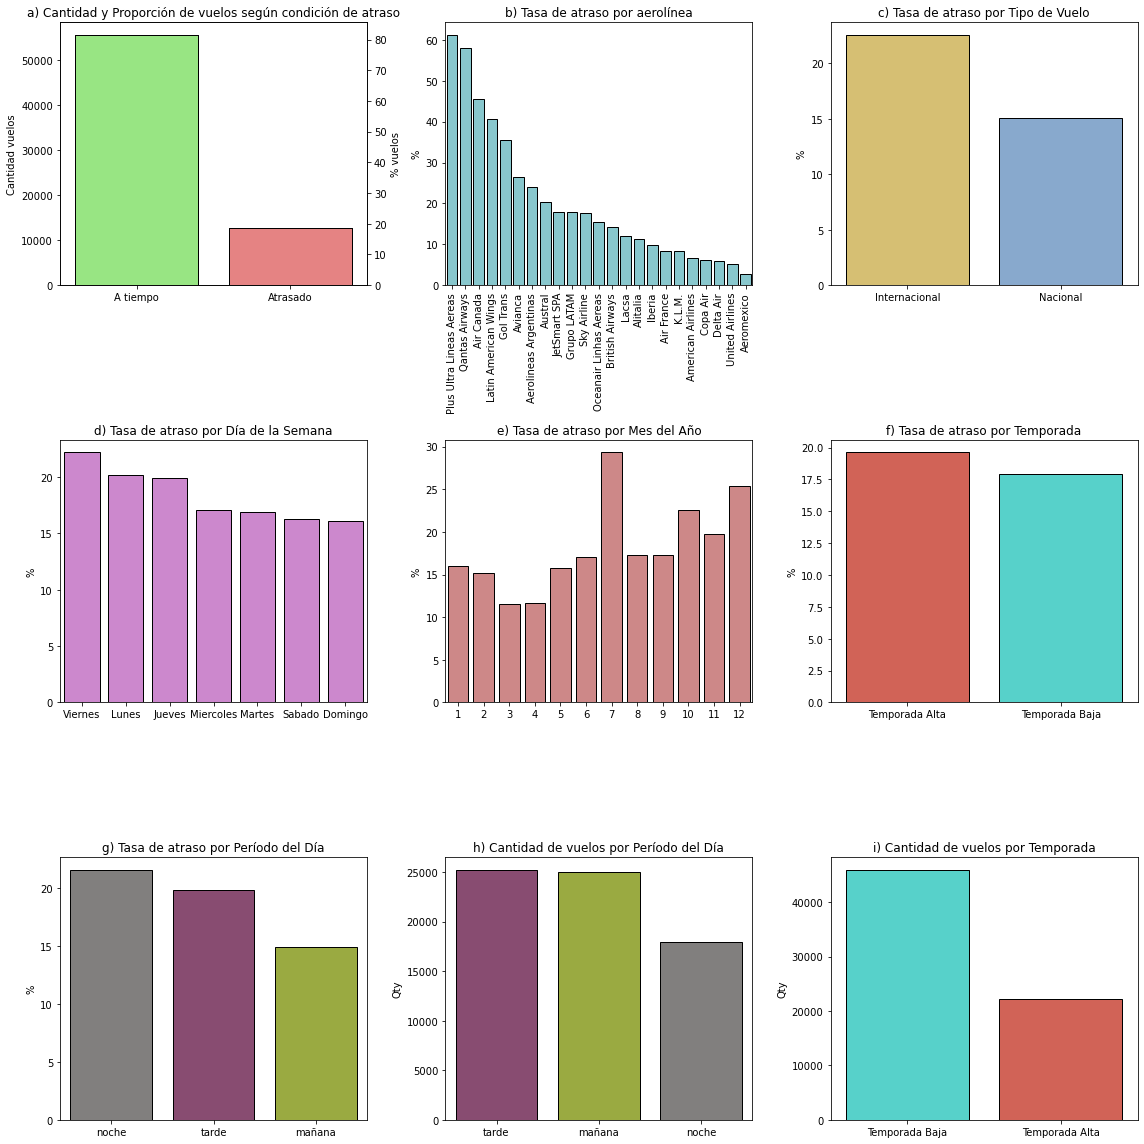

In [18]:
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(16,16))
axes = axes.flatten()

ax = axes[0]
sns.barplot(x=df.atraso_15.value_counts().index.map({0:'A tiempo',1:'Atrasado'}),y=df.atraso_15.value_counts(),ax=ax,palette=['#8FF573','#F57373'],edgecolor='k',label=True)
ax2=ax.twinx()
sns.barplot(x=df.atraso_15.value_counts(normalize=True).index.map({0:'A tiempo',1:'Atrasado'}),y=df.atraso_15.value_counts(normalize=True)*100,ax=ax2,palette=['#8FF573','#F57373'],edgecolor='k')
ax.set_title('a) Cantidad y Proporción de vuelos según condición de atraso')
ax.set_ylabel('Cantidad vuelos')
ax2.set_ylabel('% vuelos')

ax = axes[1]
y1 = df[df.atraso_15==1].OPERA.value_counts()/df.OPERA.value_counts()
y1 = y1.sort_values(ascending=False)*100
sns.barplot(x=y1.index,y=y1,ax=ax,color='#7DD1D8',edgecolor='k')
ax.tick_params(axis='x', labelrotation = 90)
ax.set_title('b) Tasa de atraso por aerolínea')
ax.set_ylabel('%')

ax = axes[2]
y4 = df[df.atraso_15==1].TIPOVUELO.value_counts()/df.TIPOVUELO.value_counts()
y4 = y4.sort_values(ascending=False)*100
sns.barplot(x=y4.index.map({'I':'Internacional','N':'Nacional'}),y=y4,ax=ax,edgecolor='k',palette=['#E7C862','#7DA8D8'])
ax.set_title('c) Tasa de atraso por Tipo de Vuelo')
ax.set_ylabel('%')

ax = axes[3]
y3 = df[df.atraso_15==1].DIANOM.value_counts()/df.DIANOM.value_counts()
y3 = y3.sort_values(ascending=False)*100
sns.barplot(x=y3.index,y=y3,ax=ax,color='#D77DD8',edgecolor='k')
ax.set_title('d) Tasa de atraso por Día de la Semana')
ax.set_ylabel('%')

ax = axes[4]
y2= df[df.atraso_15==1].MES.value_counts()/df.MES.value_counts()*100
sns.barplot(x=y2.index,y=y2,ax=ax,color='#D87D7D',edgecolor='k')
ax.set_title('e) Tasa de atraso por Mes del Año')
ax.set_ylabel('%')

ax = axes[5]
y5 = df[df.atraso_15==1].temporada_alta.value_counts()/df.temporada_alta.value_counts()
y5 = y5.sort_values(ascending=False)*100
sns.barplot(x=y5.index.map({0:'Temporada Baja',1:'Temporada Alta'}),y=y5,ax=ax,edgecolor='k',palette=['#E65342','#42E6DC'])
ax.set_title('f) Tasa de atraso por Temporada')
ax.set_ylabel('%')

ax = axes[6]
y6 = df[df.atraso_15==1].periodo_dia.value_counts()/df.periodo_dia.value_counts()
y6 = y6.sort_values(ascending=False)*100
sns.barplot(x=y6.index,y=y6,ax=ax,edgecolor='k',palette=['#817F7E','#924274','#A6BB2F'])
ax.set_title('g) Tasa de atraso por Período del Día')
ax.set_ylabel('%')

ax = axes[7]
sns.barplot(x=df.periodo_dia.value_counts().index,y=df.periodo_dia.value_counts(),ax=ax,edgecolor='k',palette=['#924274','#A6BB2F','#817F7E'])
ax.set_title('h) Cantidad de vuelos por Período del Día')
ax.set_ylabel('Qty')

ax = axes[8]
sns.barplot(x=df.temporada_alta.value_counts().index.map({0:'Temporada Baja',1:'Temporada Alta'}),y=df.temporada_alta.value_counts(),ax=ax,palette=['#42E6DC','#E65342'],edgecolor='k')
ax.set_title('i) Cantidad de vuelos por Temporada')
ax.set_ylabel('Qty')


fig.tight_layout()

#### Primeros comentarios tasa de atraso:

***a) Cantidad y Proporción de vuelos según condición de atraso:*** De los 68206 vuelos totales, hay más de 50000 vuelos que despegan a tiempo, con respecto a más de 10000 que despegan en atraso. Los vuelos en atraso representan casi un 20% del dataset.

***b) Tasa de atraso por aerolínea:*** Se puede observar que hay aerolíneas que presentan una tasa relevante de atraso, sin embargo, se conoce del punto 1 que Sky y Latam componen el 80% de la muestra, por lo que habría que comparar la tasa de atraso con la cantidad de vuelos.

***c) Tasa de atraso por Tipo de Vuelo:*** Se Observa que los vuelos Internacionales tienen una tasa de atraso de alrededor del 22%, mientras que los vuelos nacionales de un 15%. Esto podría ser un punto diferenciador ya que podría decirse que hay cierto balance entra vuelos nacionales e internacionales.

***d) Tasa de atraso por Día de la Semana:*** Los días que componen mayor tasa de atraso son los Viernes, Lunes y Jueves (alrededor de un 20%). Mientras que el Sábado y Domingo son los días con menor tasa de atraso, con alrededor de un 15%.

***e) Tasa de atraso por Mes del Año:*** Se puede resaltar que los meses de Diciembre y Julio presentan una tasa de atraso visualmente más alta con respecto al resto, con valores de alrededor de 30% y 25% respectivamente.

***f) Tasa de atraso por Temporada:*** Se observa tasa de atraso similar dentre vuelos en temporada alta y baja con valores mayores a 17.5% y menores a 20%.

***g) Tasa de atraso por Período del Día:*** Los vuelos nocturnos presentan una tasa mayor al 20%, mientras que los vuelos en la tarde una tasa ligeramente menor al 20%. Es destacable que los vuelos en la mañana tienen tasa de atraso menor al 15%.

***h) Cantidad de vuelos por Período del Día:*** La cantidad de vuelos en mañana y tarde son similares, mientras que en la noche despegan alrededor de 5000 vuelos menos con respecto a los tiempos mencionados.

***i) Cantidad de vuelos por Temporada:*** Los vuelos en temporada baja corresponden a alrededor de un 2/3 de la muestra, mientras que el 1/3 restante corresponden a vuelos en temporada alta.

De la visualización "b", surge la necesidad de poder comparar la tasa de atraso respecto a la cantidad de valores por cada categoría, para evitar dar importancia a features en donde sólo se diferencien clases que presenten una minoría en la muestra total.

Se procede a efectuar visualizaciones de Cantidad de vuelos y tasa de atraso por:
* Destinos nacionales e internacionales
* Aerolínea
* Día del año
* Hora del día

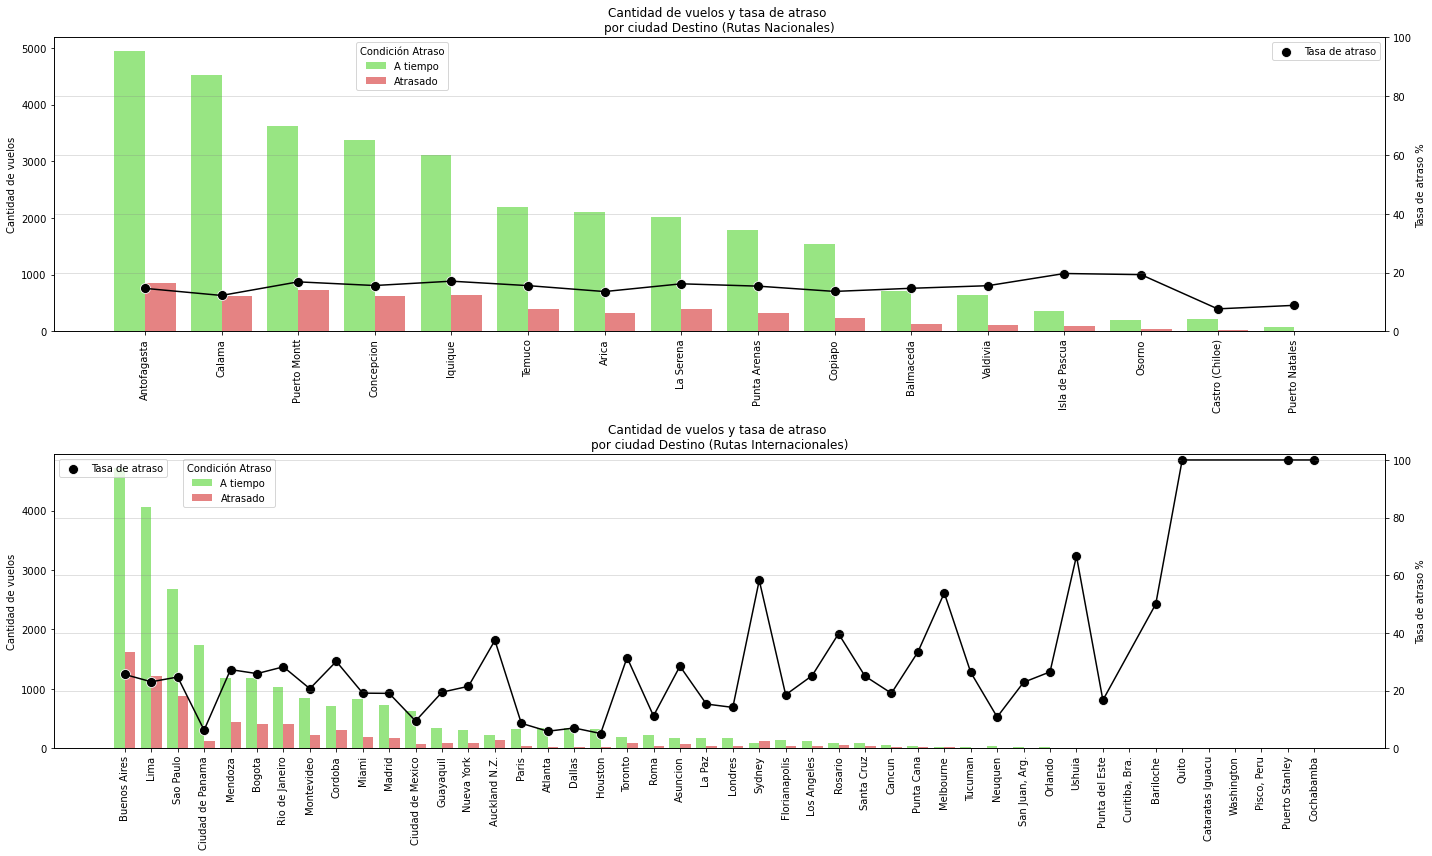

In [19]:
fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(20,12))
axes = axes.flatten()

ax = axes[0]
#y4 = y4.sort_values(ascending=False)*100
#sns.barplot(x=y4.index,y=y4,ax=ax,color='#7DA8D8',edgecolor='k')
sns.countplot(data=df[(df.TIPOVUELO=='N')],x='SIGLADES',hue='atraso_15',\
                    order=df[(df.TIPOVUELO=='N')].SIGLADES.value_counts().index,ax=ax,palette=['#8FF573','#F57373'])
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['A tiempo','Atrasado'], bbox_to_anchor=(0.3,1), title='Condición Atraso')

ax2 = ax.twinx()
y0 = 100*df[(df.atraso_15==1)&(df.TIPOVUELO=='N')].SIGLADES.value_counts()/df[df.TIPOVUELO=='N'].SIGLADES.value_counts()
y0 = y0.reindex(df[(df.TIPOVUELO=='N')].SIGLADES.value_counts().index)
sns.scatterplot(x=y0.index,y=y0,ax=ax2,color='k',s=100,label='Tasa de atraso')
sns.lineplot(x=y0.index,y=y0,ax=ax2,color='k')
ax.tick_params(axis='x', labelrotation = 90)
ax2.set_ylim([0,100])
ax.set_title('Cantidad de vuelos y tasa de atraso \npor ciudad Destino (Rutas Nacionales)')
ax.set_ylabel('Cantidad de vuelos')
ax2.set_ylabel('Tasa de atraso %')
ax.set_xlabel('')
ax2.grid(color='grey',linestyle='-',alpha=0.3)



ax = axes[1]
# y5 = y5.sort_values(ascending=False)*100
# sns.barplot(x=y5.index,y=y5,ax=ax,color='#E7C862',edgecolor='k')
sns.countplot(data=df[(df.TIPOVUELO=='I')],x='SIGLADES',hue='atraso_15',\
                    order=df[(df.TIPOVUELO=='I')].SIGLADES.value_counts().index,ax=ax,palette=['#8FF573','#F57373'])
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['A tiempo','Atrasado'], bbox_to_anchor=(0.17,1), title='Condición Atraso')

ax2 = ax.twinx()
y1 = 100*df[(df.atraso_15==1)&(df.TIPOVUELO=='I')].SIGLADES.value_counts()/df[df.TIPOVUELO=='I'].SIGLADES.value_counts()
y1 = y1.reindex(df[(df.TIPOVUELO=='I')].SIGLADES.value_counts().index)
sns.scatterplot(x=y1.index,y=y1,ax=ax2,color='k',s=100,label='Tasa de atraso')
sns.lineplot(x=y1.index,y=y1,ax=ax2,color='k')
ax.tick_params(axis='x', labelrotation = 90)
ax2.set_ylim([0,102])
ax.set_title('Cantidad de vuelos y tasa de atraso \npor ciudad Destino (Rutas Internacionales)')
ax.set_ylabel('Cantidad de vuelos')
ax2.set_ylabel('Tasa de atraso %')
ax.set_xlabel('')
ax2.grid(color='grey',linestyle='-',alpha=0.3)


fig.tight_layout()

* Vuelos Nacionales: La tasa de atraso se presenta alrededor del 20% para la mayoría de los destinos, excepotuando los dos menos frecuentes.
* Vuelos Internacionales: Se observa gran variación de la tasa de atraso para estos destinos. Sin embargo, hay muchos destinos que tienen poca cantidad de vuelos y esto afecta el porcentaje de atraso.

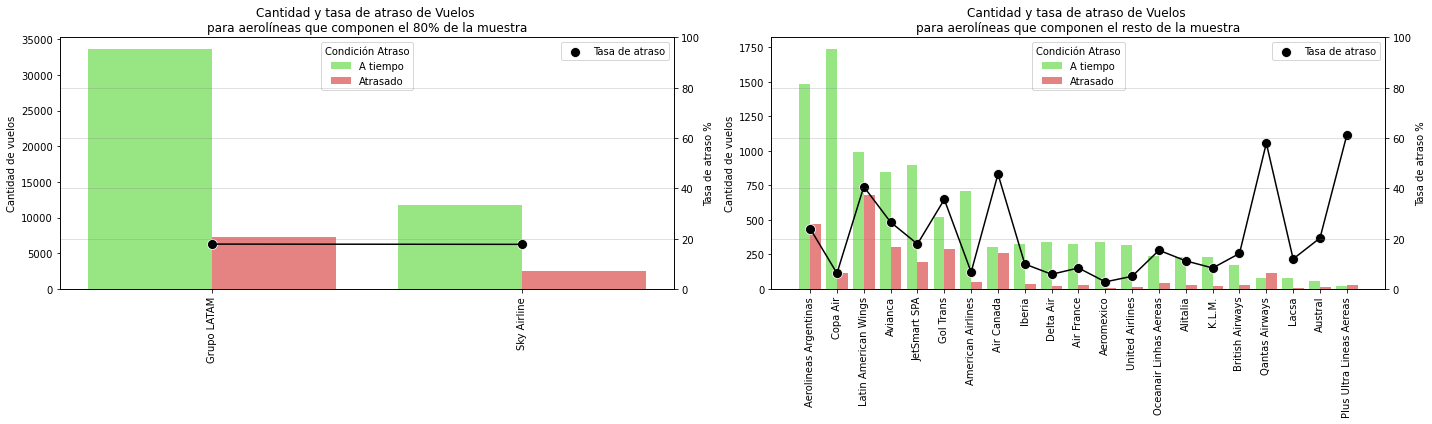

In [20]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
axes = axes.flatten()


ax = axes[0]
sns.countplot(data=df[(df.OPERA=='Grupo LATAM')|(df.OPERA=='Sky Airline')],x='OPERA',hue='atraso_15',\
                    order=df[(df.OPERA=='Grupo LATAM')|(df.OPERA=='Sky Airline')].OPERA.value_counts().index,ax=ax,palette=['#8FF573','#F57373'])
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['A tiempo','Atrasado'], loc='upper center', title='Condición Atraso')

ax2 = ax.twinx()
y0 = 100*df[(df.atraso_15==1)&((df.OPERA=='Grupo LATAM')|(df.OPERA=='Sky Airline'))].OPERA.value_counts()/df[((df.OPERA=='Grupo LATAM')|(df.OPERA=='Sky Airline'))].OPERA.value_counts()
y0 = y0.reindex(df[(df.OPERA=='Grupo LATAM')|(df.OPERA=='Sky Airline')].OPERA.value_counts().index)
sns.scatterplot(x=y0.index,y=y0,ax=ax2,color='k',s=100,label='Tasa de atraso')
sns.lineplot(x=y0.index,y=y0,ax=ax2,color='k')
ax2.set_ylim([0,100])
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel('Cantidad de vuelos')
ax2.set_ylabel('Tasa de atraso %')
ax.set_title('Cantidad y tasa de atraso de Vuelos \npara aerolíneas que componen el 80% de la muestra')
ax.set_xlabel('')
ax2.grid(color='grey',linestyle='-',alpha=0.3)


ax = axes[1]
sns.countplot(data=df[(df.OPERA!='Grupo LATAM')&(df.OPERA!='Sky Airline')],x='OPERA',hue='atraso_15',\
                    order=df[(df.OPERA!='Grupo LATAM')&(df.OPERA!='Sky Airline')].OPERA.value_counts().index,ax=ax,palette=['#8FF573','#F57373'])
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['A tiempo','Atrasado'], loc='upper center', title='Condición Atraso')
ax.tick_params(axis='x', labelrotation = 90)

ax2 = ax.twinx()
y1 = 100*df[(df.atraso_15==1)&((df.OPERA!='Grupo LATAM')&(df.OPERA!='Sky Airline'))].OPERA.value_counts()/df[((df.OPERA!='Grupo LATAM')&(df.OPERA!='Sky Airline'))].OPERA.value_counts()
y1 = y1.reindex(df[(df.OPERA!='Grupo LATAM')&(df.OPERA!='Sky Airline')].OPERA.value_counts().index)
sns.scatterplot(x=y1.index,y=y1,ax=ax2,color='k',s=100,label='Tasa de atraso')
sns.lineplot(x=y1.index,y=y1,ax=ax2,color='k')
ax2.set_ylim([0,100])
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel('Cantidad de vuelos')
ax2.set_ylabel('Tasa de atraso %')
ax.set_title('Cantidad y tasa de atraso de Vuelos \npara aerolíneas que componen el resto de la muestra')
ax.set_xlabel('')
ax2.grid(color='grey',linestyle='-',alpha=0.3)



fig.tight_layout()

* Para las aerolíneas que componen el 80% de la muestra (Latam y Sky), se presenta una tasa de atraso cercana al 20%, muy similar al valor general del atraso.
* Para las demás aerolíneas se presentan más variaciones en la tasa de atraso, aun así, similar al caso de los viajes internacionales, algunas tasas pueden verse sesgadas por la poca cantidad de datos.

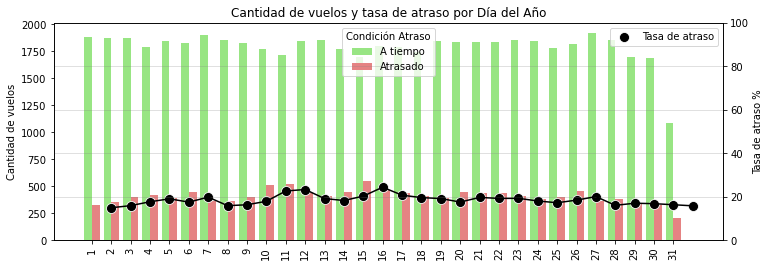

In [22]:
fig, axes = plt.subplots(1,1,figsize=(12,4))

ax = axes
sns.countplot(data=df,x='DIA',hue='atraso_15',\
                    #order=df.DIA.value_counts().index,
                    ax=ax,palette=['#8FF573','#F57373'])
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['A tiempo','Atrasado'], loc='upper center', title='Condición Atraso')
ax.tick_params(axis='x', labelrotation = 90)

ax2 = ax.twinx()
ax2.set_ylim([0,100])
y0= df[df.atraso_15==1].DIA.value_counts()/df.DIA.value_counts()*100
#y0 = y0.reindex(df.DIA.value_counts().index)
sns.scatterplot(x=y0.index,y=y0,ax=ax2,color='k',s=100,label='Tasa de atraso')
sns.lineplot(x=y0.index,y=y0,ax=ax2,color='k')

ax.set_title('Cantidad de vuelos y tasa de atraso por Día del Año')
ax.set_ylabel('Cantidad de vuelos')
ax2.set_ylabel('Tasa de atraso %')
ax.set_xlabel('')
ax2.grid(color='grey',linestyle='-',alpha=0.3)


* Se observa mayor tasa de atraso en los vuelos a mitad de mes, aun así la variación es muy pequeña y los valores rondan el 20%, que representa la tasa de atraso general.

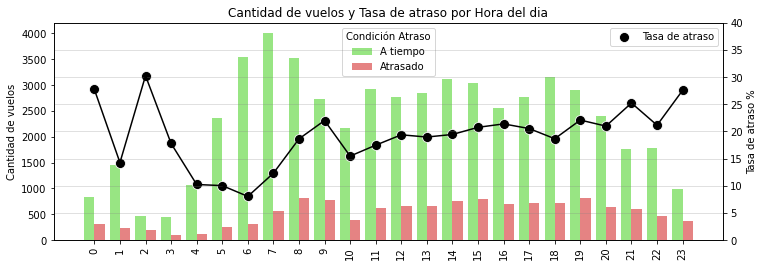

In [23]:
fig, axes = plt.subplots(1,1,figsize=(12,4))

ax = axes
sns.countplot(data=df,x='hora_o',hue='atraso_15',\
                    #order=df.DIA.value_counts().index,
                    ax=ax,palette=['#8FF573','#F57373'])
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['A tiempo','Atrasado'], loc='upper center', title='Condición Atraso')
ax.tick_params(axis='x', labelrotation = 90)

ax2 = ax.twinx()
ax2.set_ylim([0,40])
y0= df[df.atraso_15==1].hora_o.value_counts()/df.hora_o.value_counts()*100
#y0 = y0.reindex(df.DIA.value_counts().index)
sns.scatterplot(x=y0.index,y=y0,ax=ax2,color='k',s=100,label='Tasa de atraso')
sns.lineplot(x=y0.index,y=y0,ax=ax2,color='k')

ax.set_title('Cantidad de vuelos y Tasa de atraso por Hora del dia')
ax.set_ylabel('Cantidad de vuelos')
ax2.set_ylabel('Tasa de atraso %')
ax.set_xlabel('')
ax2.grid(color='grey',linestyle='-',alpha=0.3)


* Se aprecia que la tasa de atraso tiene grandes fluctuaciones respecto a la hora de salida de los vuelos en las primeras horas de la mañana, para luego estabilizarse alrededor del 20-30%, que de igual forma, presenta fluctiaciones.

#### ¿Qué variables esperarías que más influyeran en predecir atrasos?
Las variables que esperaría tengan más influencia en predecir atrasos son aquellas que más puedan separar el target. Sin embargo, ninguna de las variables separa el target directamente, sino que alguna de sus categorías acumulan mayores o menores tasas de atraso. Dado esto, esperaría que las variables más influyentes son aquellas cuyas categorías tienen más fluctuación en la tasa de atraso, como lo son: **destino, hora del día y aerolínea.**

## 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo.Siéntete libre de generar variables adicionales y/o complementar con variables externas.